# Construct Binary Tree from Preorder and Inorder Traversal
Given two integer arrays `preorder` and `inorder` where `preorder` is the preorder traversal of a binary tree and `inorder` is the inorder traversal of the same tree, construct and return the binary tree.

# Examples
**Example 1:**

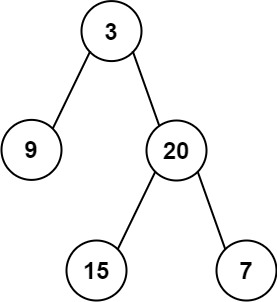
```
Input: preorder = [3,9,20,15,7], inorder = [9,3,15,20,7]
Output: [3,9,20,null,null,15,7]
```

**Example 2:**
```
Input: preorder = [-1], inorder = [-1]
Output: [-1]
```

**Example 3:**

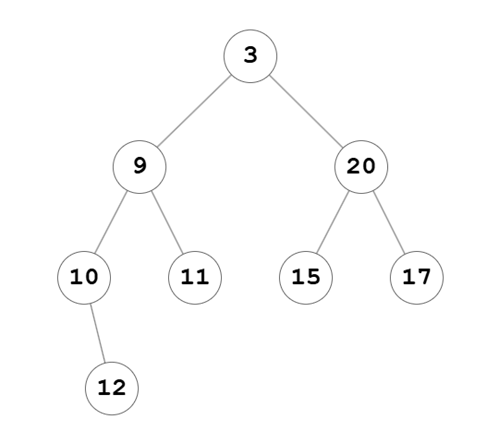
```
Input: preorder = [3, 9, 10, 12, 11, 20, 15, 17], inorder = [10, 12, 9, 11, 3, 15, 20, 17]
Output: [3, 9, 20, 10, 11, 15, 17, null, 12]
```

`inorder` has the following property: if `inorder[i]` is the root of the tree, then `inorder[:i]` is the inorder traversal of the left subtree, and `inorder[i+1:]` is the inorder traversal of the right subtree.

In [1]:
from typing import Optional

# Definition for a binary tree node.


class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right


class Solution:
    def buildTree(self, preorder: list[int], inorder: list[int]) -> Optional[TreeNode]:
        inorder_table = {elem: index for index, elem in enumerate(inorder)}
        root = TreeNode(val=preorder[0])
        stack = [root]
        for elem in preorder[1:]:
            if inorder_table[elem] < inorder_table[stack[-1].val]:
                left_node = TreeNode(val=elem)
                stack[-1].left = left_node
                stack.append(left_node)
            else:
                while len(stack) > 0 and inorder_table[elem] > inorder_table[stack[-1].val]:
                    temp = stack.pop()
                right_node = TreeNode(val=elem)
                temp.right = right_node
                stack.append(right_node)
        return root

In [2]:
from typing import Optional

# Definition for a binary tree node.


class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right


class Solution:
    def buildTree(self, preorder: list[int], inorder: list[int]) -> Optional[TreeNode]:
        inorder_table = {elem: index for index, elem in enumerate(inorder)}

        def helper(pre_start, in_start, in_end):
            if pre_start >= len(preorder) or in_start > in_end:
                return None
            root_val = preorder[pre_start]
            root_index = inorder_table[root_val]
            root = TreeNode(val=root_val)
            root.left = helper(pre_start + 1, in_start, root_index - 1)
            root.right = helper(
                pre_start + root_index - in_start + 1, root_index + 1, in_end
            )
            return root

        return helper(0, 0, len(preorder) - 1)

# Construct Binary Tree from Inorder and Postorder Traversal
Given two integer arrays `inorder` and `postorder` where `inorder` is the inorder traversal of a binary tree and `postorder` is the postorder traversal of the same tree, construct and return the binary tree.

# Examples
**Example 1:**

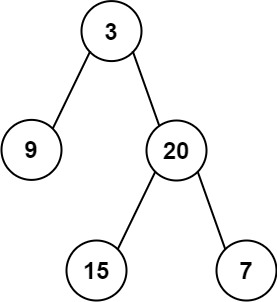
```
Input: inorder = [9,3,15,20,7], postorder = [9,15,7,20,3]
Output: [3,9,20,null,null,15,7]
```

**Example 2:**
```
Input: inorder = [-1], postorder = [-1]
Output: [-1]
```

In [3]:
from typing import Optional

# Definition for a binary tree node.


class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right


class Solution:
    def buildTree(self, inorder: list[int], postorder: list[int]) -> Optional[TreeNode]:
        inorder_table = {value: index for index, value in enumerate(inorder)}

        def helper(post_end, in_start, in_end):
            if post_end < 0 or in_start > in_end:
                return None
            root_val = postorder[post_end]
            root_ind = inorder_table[root_val]
            root = TreeNode(val=root_val)
            root.left = helper(
                post_end - (in_end - root_ind) - 1, in_start, root_ind - 1
            )
            root.right = helper(post_end - 1, root_ind + 1, in_end)
            return root

        return helper(len(postorder) - 1, 0, len(postorder) - 1)